In [2]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [4]:
def classify_performance(rating):
    if rating <= 2:
        return 'Rendah'
    elif rating == 3:
        return 'Sedang'
    else:
        return 'Tinggi'

df['PerformanceCategory'] = df['PerformanceRating'].apply(classify_performance)


In [5]:
drop_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'PerformanceRating']
df.drop(columns=drop_cols, inplace=True)


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('PerformanceCategory', axis=1)
y = df['PerformanceCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[249   0]
 [  0  45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00        45

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



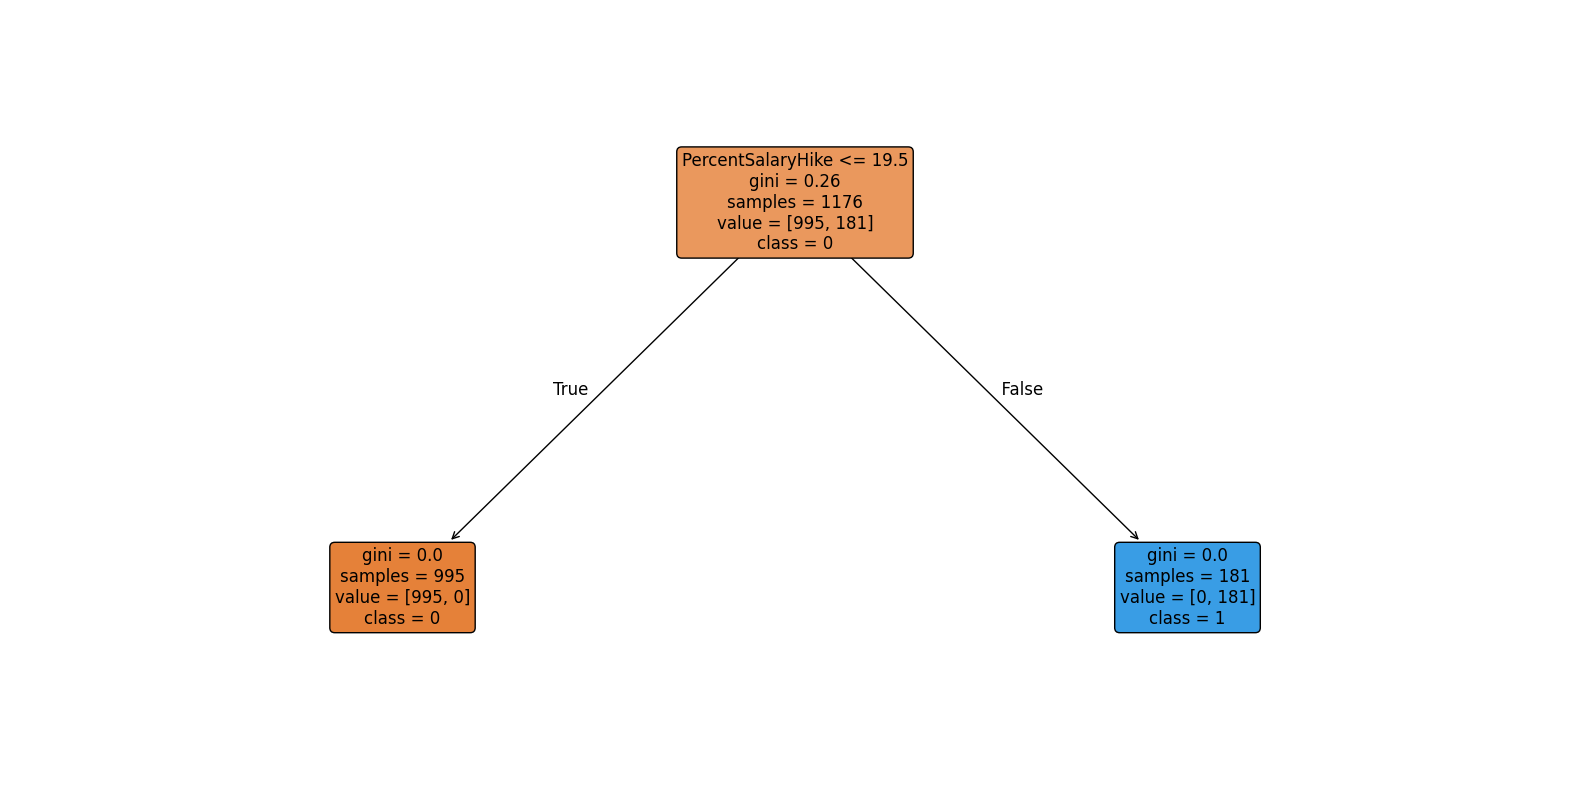

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))  # Ukuran lebih kecil
plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in model.classes_],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.tight_layout()
plt.show()
